In [1]:
from __future__ import (division, print_function)

In [2]:
%autoreload 2
%matplotlib inline

In [3]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import h5py
from collections import OrderedDict

In [5]:
import sys
sys.path.append("../")
import get_gal_centroids as getg
import plot_gal_prop as plotg

In [6]:
data_f = h5py.File("../../data/Illustris-1_fof_subhalo" +
                   "_myCompleteHaloCatalog_00135.hdf5")
h5_fstream = h5py.File("../../data/clst20_fhat.h5")
peaks_df = pd.read_hdf("../../data/clst20_peak_df.h5", "peak_df")

In [7]:
clst13 = peaks_df[peaks_df.clstNo == 13]

In [8]:
metakeys = getg.metakeys()
print(metakeys)

['clstNo', 'cut', 'weights', 'los_axis', 'xi', 'phi']


these are the meta data that we will group by 
since there are several peaks for a specific set 
of metadata

In [9]:
gpby13 = clst13.groupby(metakeys)
groups = OrderedDict(list(gpby13))

# Examine how total peaks dens vary as a function of projection

In [20]:
import seaborn as sns
sns.set_style("white")

In [23]:
total_peaks = gpby13["peaks_dens"].agg(np.sum)
total_peaks = total_peaks.reset_index()

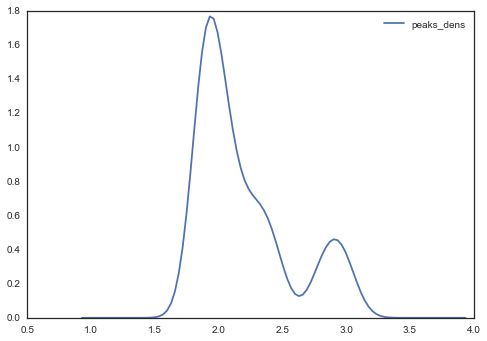

In [25]:
sns.kdeplot(total_peaks["peaks_dens"], bw='scott')

# visualize different projections

In [10]:
fhat_dict = {gp_keys: 
             getg.retrieve_fhat_from_gp(gp_keys, gp_vals, h5_fstream)
             for gp_keys, gp_vals in groups.iteritems()
             }

due to how the data is stored, subsequent projections
shown here may not reflect if two projections are close 
in angular space.

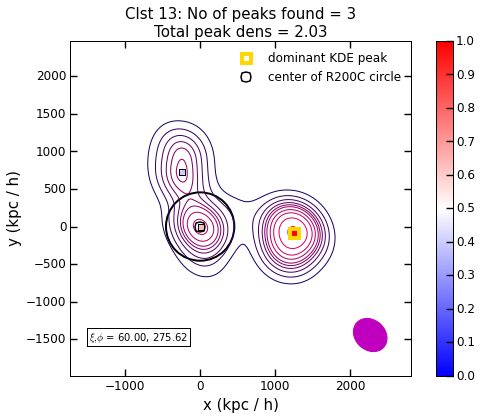

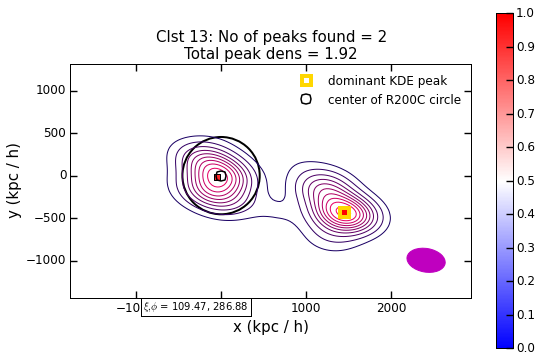

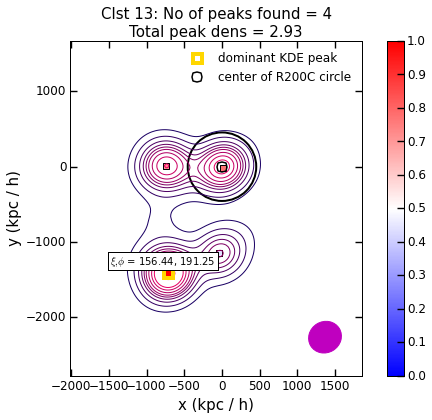

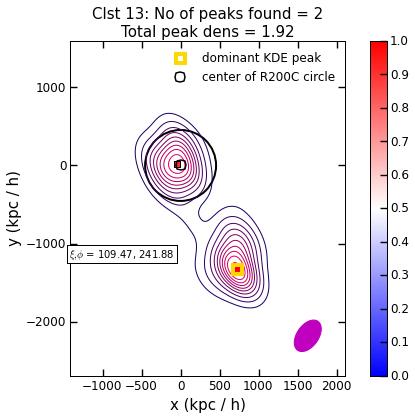

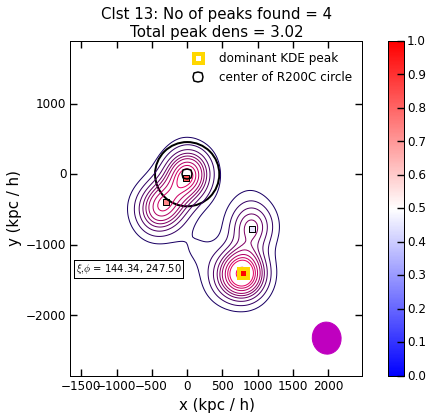

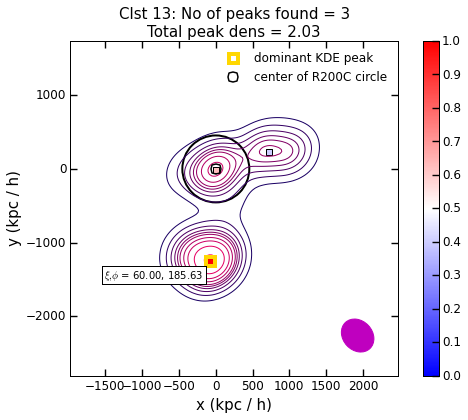

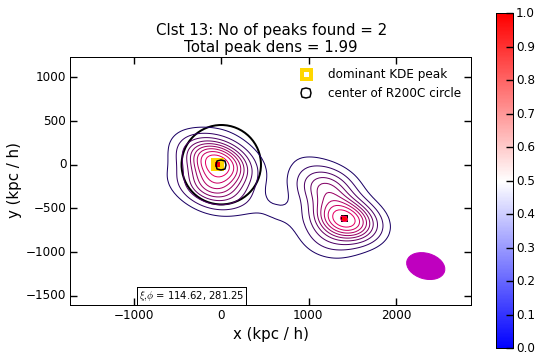

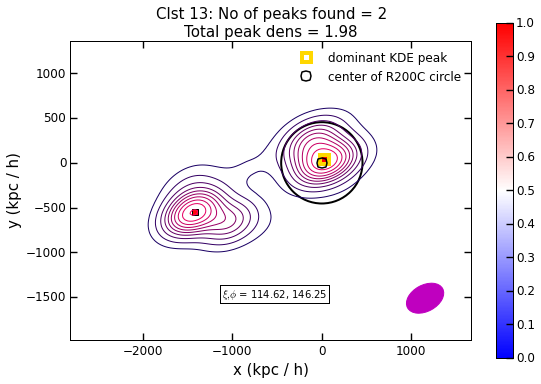

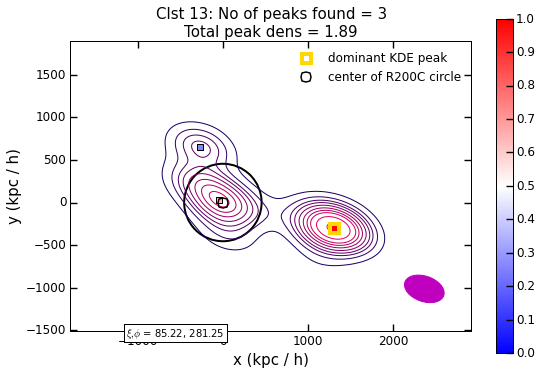

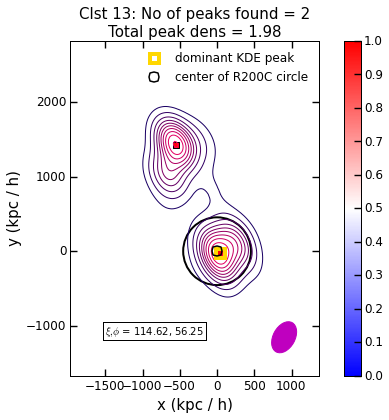

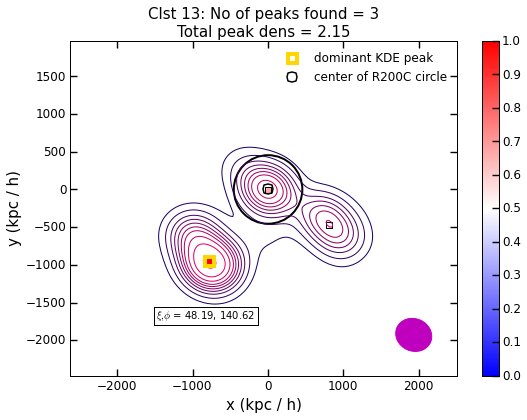

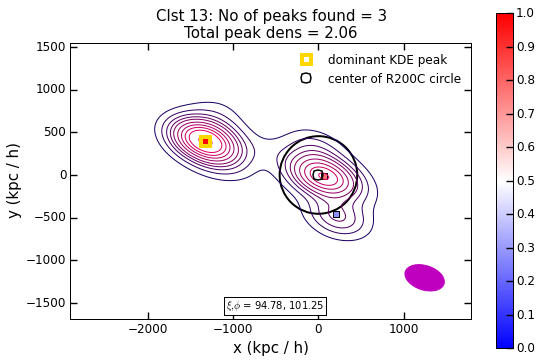

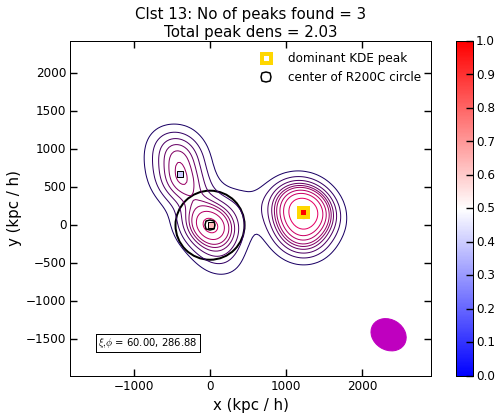

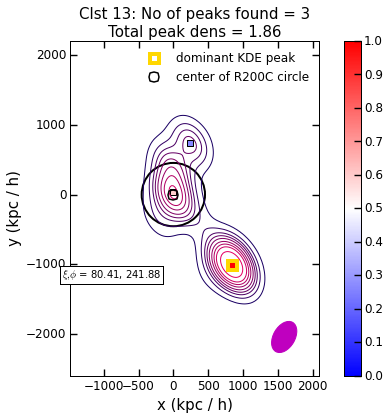

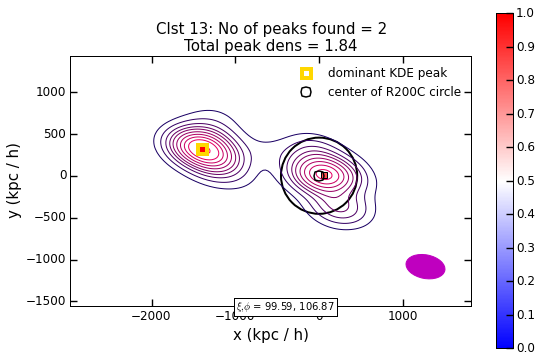

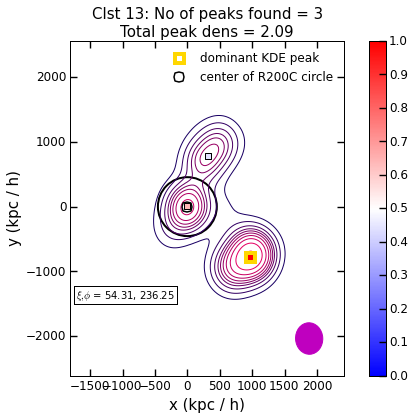

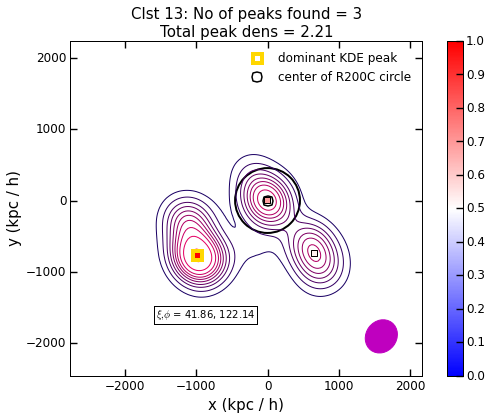

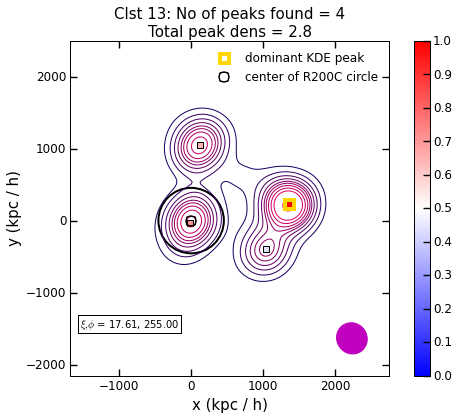

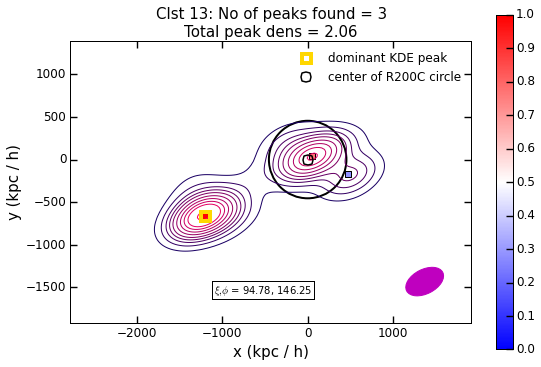

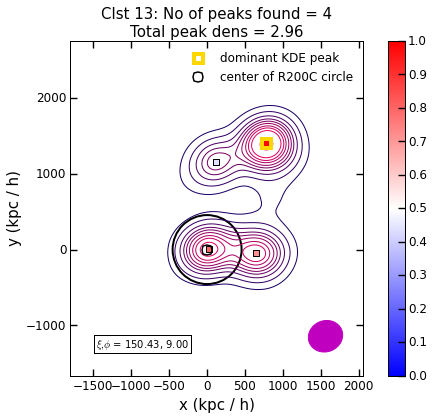

In [84]:
for key in fhat_dict.keys()[:20]:
    clstNo = key[0]
    fig = plt.figure()
    
    ax = fig.add_subplot(111, aspect='equal')

    plotg.plot_KDE_peaks(fhat_dict[key], 
                         clstNo=clstNo,
                         allPeaks=True, 
                         R200C=data_f["Group"]['Group_R_Crit200'][clstNo],
                         ax=ax, fig=fig)
    fig.set_figheight(1.5 * fig.get_figheight())
    fig.set_figwidth(1.5 * fig.get_figwidth())
    
    figheight = np.abs(np.diff(ax.get_xlim()))
    figwidth = np.abs(np.diff(ax.get_ylim()))
    ax.text(-figwidth / 3., -figheight / 3., 
            r"$\xi, \phi$ = {:.2f}, {:.2f}".format(
            *((np.array(key[-2:]) * 180. / np.pi)), size=50)
            , bbox=dict(facecolor='white'))